Jane McNicoll

Homework 2

For most problems in this assignment I explained my work and gave answers first, and then provided the python code I used to reach those answers below. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Q1. If we lived in a Olberian universe calculate the distance at which any random line-of-sight will intersect the surface of a star (this is referred to as the point at which the optical depth of uniformly distributed stars is unity). 
Assume all the stars have the same luminosity as the Sun, the average number
density of stars is 10e9 Mpc^-3, and the radius of the stars is 7e8m.

There is a very easy way to solve this problem, by simply taking the cross 
section of a star by using the formula 
$a = \pi R^{2}$
and converting it to Mpc^2. Then I calculated the mean free path of the photons using the formula 
$mfp = \frac{1}{n a}$
This gives the distance at which any random line-of-sight will intersect the surface of a star, 6.18e17 Mpc.

In [2]:
r = 700000000.0
def crosssection(radius):
    meters = (np.pi)*(radius)**2
    return meters*1.0503e-45
print("The cross section of a single star is", crosssection(r), "Mpc^2")
a = crosssection(r) 
def meanfreepath(area):
    n= 1000000000.0
    d = 1.0/n/area
    return d
print("The distance at which any random line-of-sight will intersect the surface of a star is", meanfreepath(a), "Mpc.")


The cross section of a single star is 1.616811234392026e-27 Mpc^2
The distance at which any random line-of-sight will intersect the surface of a star is 6.185013925735324e+17 Mpc.


Q2. When Edwin Hubble measured the expansion rate of the universe he derived a
Hubble’s constant of $500 km s^{-1} Mpc^{-1}$. To get this value of $H_o$ how incorrect were
his estimates of the distances to Cepheid stars. How does his value of the
universe change the age of the universe and would we need to live in an
accelerating or decelerating universe in order to reconcile the Hubble time with
the current age of the universe (13.7 Gyr).

$H_{0, hubble}= 500 km s^{-1} Mpc^{-1}$

$H_{0, actual}= 70 km s^{-1} Mpc^{-1}$

In order to know how incorrect the Cepeid distances Hubble measured were, we have to know how far off $H_{0, hubble}$ was from $H_{0, actual}$ and how the Hubble constant affects distance calculations. 
For the first part I used a simple percent-error equation to find how far off $H_{0, hubble}$ was from $H_{0, actual}$ and found that $H_{0, hubble}$ was off from $H_{0, actual}$ by a factor of 6.14. 
Then I looked at how the constant affected calculated distances. Since $v = H_{0}d$ we can see that there is a linear relationship between $d$ and $H_{0}$. That means that Hubble's Cepheid distance is off of the actual distance by the same factor as $H_{0, hubble}$ is off from $H_{0, actual}$, which is 6.14. 

In [3]:
def percenterror(measured, actual):
    error = (measured - actual)/actual
    return format(error, '.2f')
print("The constant that Hubble measured was off from the actual constant by a factor of", percenterror(500,70))

The constant that Hubble measured was off from the actual constant by a factor of 6.14


Using $H_{0, hubble}$ to find the age of the universe gives you an age of 1.96 Gyrs, which is pretty far off from the actual age of the universe as we know it today, which is 13.9 Gyrs. Hubble's estimate was far too low, which tells us that the rate of expansion during Hubble's time must have been less than the rate of expansion today, meaning we must live in an accelerating universe.

In [4]:
mpc2km = 3.241e-20
def age(H):
    units = 60*60*24*365*1e9
    a = 1.0/(H*mpc2km)/(units)
    return a
print("Using Hubble's original constant gives us", age(500), "Gyrs as the age of the universe.")
print("The correct constant gives us", age(70), "as the age of the universe.")
    

Using Hubble's original constant gives us 1.9567906191770805 Gyrs as the age of the universe.
The correct constant gives us 13.97707585126486 as the age of the universe.


Q3. Suppose you are a two-dimensional being living on the surface of a sphere with radius R. An object of width ds << R is at a distance r from you (remember, all distances are measured on the surface of the sphere). What angular width dθ will you measure for the object?

Explain the behavior of dθ as r → πR.

First I used the metric for a polar coordinate system: 
$ds^{2} = dr^{2} + R^{2}sin^2({r/R})d\theta$
and visualized either side of the object with width $ds$ at the coordinates $(r, \theta)$ and $(r+dr, \theta+d\theta)$.
Since this is an arbitrary coordinate system I can set these points to be wherever I want, so to make things easy I set it so that $dr=0$. If $dr=0$ I can plug that into the metric and get that $ds^2 = R^{2}sin^2({r/R})d\theta$. If I solve this equation for angular distance I get $d\theta = \frac{ds}{R sin(r/R)}$. 

As r → πR,  dθ gets larger and then smaller (specifically larger as r → πR/2 and smaller after r > πR/2), which makes sense because I am on the surface of a sphere, and any two lines that originate from me will meet back together on the opposite side of the sphere as me, meaning as r → πR/2 they will diverge and dθ will get larger, and after r → πR/2 they will converge and dθ will get smaller agian. 

Q4. Using Python solve the following equation numerically and plot a(t) vs t. 

$\dot{a}^2 = H_{0}^2 a^{-3}$

Solve the integration algebraically and overlay the solution on your plot

Solving algebraically:
If I rearrange the given differential equation I get 
$\frac{da}{dt} = H_0 a^{-\frac{3}{2}}$.
If I integrate both sides with respect to $t$ I then have $a = {(\frac{5}{2}H_0t})^\frac{2}{5}$

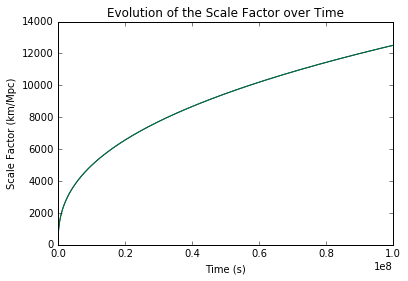

In [8]:
H_0 = 70
##algebraic solve
def algebraic(t):
    d1 = ((5.0/2.0)*(H_0)*t)**(2.0/5.0)
    return d1

##numerical solve
t_range = np.linspace(0, 100000000, 10000000)
def numerical(a,t):
    d2 = (H_0/a**(1.5))
    return d2

numericalsolve = odeint(numerical, 1, t_range)

plt.plot(t_range, algebraic(t_range))
plt.plot(t_range, numericalsolve)
plt.xlabel("Time (s)")
plt.ylabel("Scale Factor (km/Mpc)")
plt.title("Evolution of the Scale Factor over Time")

plt.show()


You can't really tell that the two plots are on the same graph because they overalp, so just to show that I have both of them I have plotted them separately below

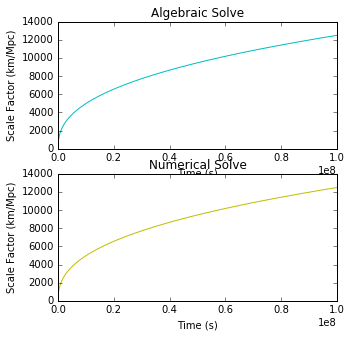

In [13]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(5,5) 


ax[0].plot(t_range, algebraic(t_range), color='c')
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Scale Factor (km/Mpc)")
ax[0].set_title("Algebraic Solve")


ax[1].plot(t_range, numericalsolve, color='y')
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Scale Factor (km/Mpc)")
ax[1].set_title("Numerical Solve");